1: 모든 변수를 넣은 로지스틱 회귀 분석
===
Validation Set에서 Purchase가 1일 확률을 얻어 상위 500명을 선정하고자, 
모든 변수를 활용한 회귀분석을 시행하였습니다.

(결과 예측에 영향이 없는 id 변수는 모든 과정에서 제외)

------------------

- csv 데이터 파일을 불러와 training set과 test set으로 분류합니다.
---

In [12]:
#rm(list = ls())
#dev.off()

data0 = read.csv('./mailorder.csv')
data0$gender <- as.numeric(gender) # 차후 logit regression을 위한 가공
data0 <- data0[,2:7] #id 변수 제외
str(data0)
trset = data0[1 : 2000,]
tset = data0[2001 : 4000,]



'data.frame':	4000 obs. of  6 variables:
 $ gender   : num  2 1 1 1 1 2 1 1 1 1 ...
 $ monetary : int  138 172 272 149 113 15 238 418 123 294 ...
 $ recency  : int  28 16 8 16 8 26 2 6 12 6 ...
 $ frequency: int  3 2 1 1 1 1 11 11 1 2 ...
 $ duration : int  40 20 8 16 8 26 42 66 12 8 ...
 $ purchase : int  0 0 0 0 1 0 0 1 0 0 ...


- training set에 전체 변수를 적용해 로지스틱 회귀 모형을 적합합니다.
---

In [13]:
glm.fit0 = glm(purchase~., data = trset, family = binomial)
lm.fit0 = lm(purchase~., data = trset)
summary(glm.fit0)


Call:
glm(formula = purchase ~ ., family = binomial, data = trset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0272  -0.4445  -0.3461  -0.2645   3.0157  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.1057486  0.3429606  -9.056  < 2e-16 ***
gender       0.6446095  0.1723430   3.740 0.000184 ***
monetary     0.0010490  0.0009594   1.093 0.274183    
recency     -0.0673636  0.0169854  -3.966 7.31e-05 ***
frequency    0.1388373  0.0540685   2.568 0.010234 *  
duration    -0.0098151  0.0111535  -0.880 0.378857    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1129.7  on 1999  degrees of freedom
Residual deviance: 1046.2  on 1994  degrees of freedom
AIC: 1058.2

Number of Fisher Scoring iterations: 6


- 적합한 모델로 test set의 purchase를 예측합니다. 각 데이터의 purchase 값이 1일 확률을 알아보는 과정입니다.
---

In [14]:
set.seed(1)
glm.probs0 = predict(glm.fit0,  type = 'response', tset)
glm.probs0[1:10]
length(glm.probs0)
summary(glm.probs0)


2001       2002       2003       2004       2005       2006       2007 
0.06914239 0.06113972 0.06005054 0.09836331 0.07637210 0.09205795 0.06183332 
      2008       2009       2010 
0.08129474 0.05333903 0.07720569

[1] 2000

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.006507 0.040748 0.065672 0.079822 0.102768 0.433726 

- 나온 확률이 0.5 이하면 0, 이상이면 1을 넣어 예측해봅니다.
---

In [15]:
glm.pred0 = rep(1, 2000)
glm.pred0[1:10]
glm.pred0[glm.probs0 < .5] = 0
summary(glm.pred0)

[1] 1 1 1 1 1 1 1 1 1 1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

- 모델로 예측해 나온 purchase 확률이 0.5 이상인 것이 하나도 없습니다. 때문에 로지스틱 회귀모형은 모든 값을 0으로 처리합니다. 불균형 자료인 이 프로젝트 특성 상 91%의 정확도를 보이지만 민감도는 0%입니다.
---

In [16]:
table(tset$purchase, glm.pred0)
mean(glm.pred0 == data0$purchase)

   glm.pred0
       0
  0 1838
  1  162

[1] 0.91875

- 모델로 예측해 나온 test set의 'pusrchase 값이 1일 확률'을 토대로 상위 500명을 뽑아 봅니다. 이들의 실제 purchase 값을 비교해 본 결과, 89명은 1을 기록하고 있습니다. 이들에게 카탈로그를 보낸다면 17.8%의 구매 반응율을 볼 수 있습니다.
---

In [26]:
tset$prob <- glm.probs0
#head(data0$prob)
idx <- order(tset$prob, decreasing = T) # purchase가 1일 확률이 높은 순서로 정렬
str(idx)
head(idx)

ordered_tset <- tset[idx, ]
head(ordered_tset[1:500,])
table(ordered_tset[1:500, ]$purchase == 1)

 int [1:2000] 1773 699 790 1067 1414 1901 963 102 221 291 ...


[1] 1773  699  790 1067 1414 1901

,gender,monetary,recency,frequency,duration,purchase,prob
3773,2,412,2,11,28,0,0.4337259
2699,2,341,2,12,40,1,0.4206533
2790,2,264,4,12,30,1,0.3923502
3067,2,408,2,11,46,0,0.3899471
3414,2,304,6,12,38,1,0.3523488
3901,2,282,2,11,50,0,0.3500148



FALSE  TRUE 
  411    89 

----------------

2. LASSO를 통한 변수 선택
===
- 더 높은 예측률을 위해 변수 선택 과정을 기획했습니다. Lasso Regression으로 변수 선택 및 계수 추정을 함께 수행합니다.

--------

- glmnet 함수 적용을 위한 데이터의 분할 및 매트릭스화 작업입니다.
---

In [20]:
library(glmnet)
train = c(1:2000)
test = c(2001:4000)

y = data0$purchase
x = as.matrix(data0[, -6])
length(y[test])

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-10



[1] 2000

- glmnet 함수로는 lasso regression 모델을 적합시키고, cv.glmnet 함수로는 최소 CV 에러를 갖는 lambda 값을 도출합니다. (lambda.min)
---

In [22]:
model <- glmnet(x[train, ], y[train], family = 'binomial', alpha = 1)
set.seed(1)
cv.out <- cv.glmnet(x[train, ], y[train])
dim(coef(model))
coef(model) #51개의 lambda 값에 따른 모델 계수들의 변화
cv.out$lambda.min

[1]  6 51

   [[ suppressing 51 column names ‘s0’, ‘s1’, ‘s2’ ... ]]


6 x 51 sparse Matrix of class "dgCMatrix"
                                                                      
(Intercept) -2.422139 -2.378260893 -2.35643562 -2.33583888 -2.31645447
gender       .         .            .           .           .         
monetary     .         .            .           .           .         
recency      .        -0.005310784 -0.01028321 -0.01495486 -0.01934124
frequency    .         0.006578271  0.01705053  0.02632195  0.03457430
duration     .         .            .           .           .         
                                                                       
(Intercept) -2.29825359 -2.34653072 -2.39843474 -2.44502085 -2.48695867
gender       .           0.05240721  0.10645778  0.15500274  0.19890079
monetary     .           .           .           .           .         
recency     -0.02345606 -0.02744459 -0.03119231 -0.03467109 -0.03793814
frequency    0.04195143  0.04839211  0.05416543  0.05934828  0.06406347
duration     .           .   

[1] 0.002648598

- plotting을 통해 최적의 lambda 값과 모델의 계수를 시각화합니다.
---

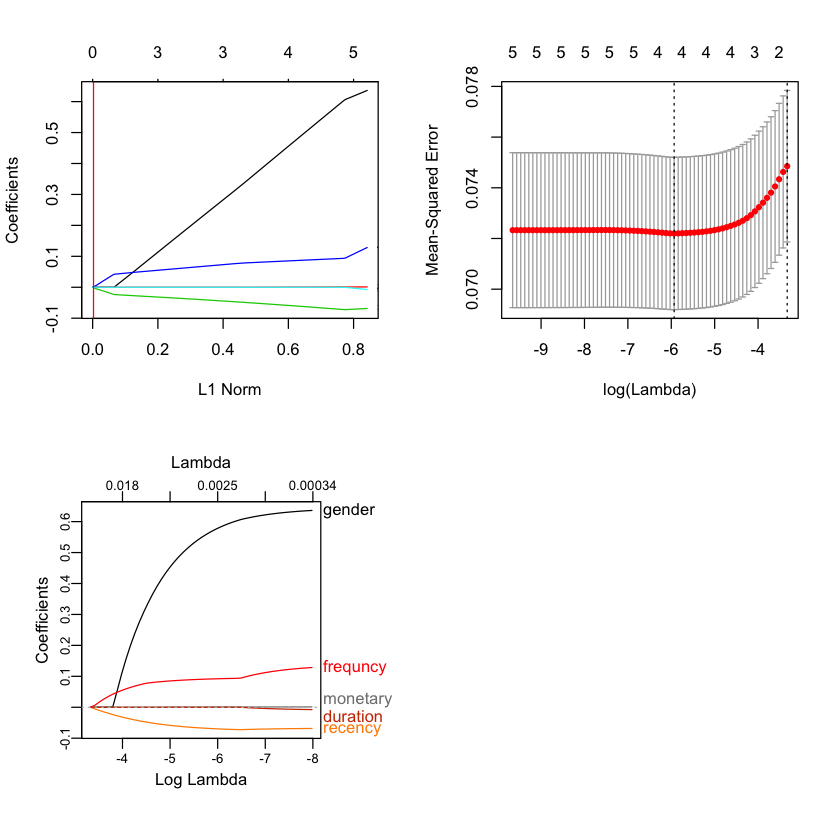

In [31]:
library(plotmo)

par(mfrow = c(2, 2))
plot(model, label = TRUE)
abline(v = cv.out$lambda.min, col = 'red')
#legend('topright', lenged = ('id', 'gender', 'monetary', 'recency', 'frequency', 'duration'))
plot(cv.out)
library(plotmo)
plot_glmnet(model)

- type = 'coefficients' 설정으로 lasso regression 모델의 계수를 찾습니다. lasso 절차를 통해 duration이 purchase를 예측하는데 무의미한 변수인 것으로 나타났습니다. 
---

In [32]:
set.seed(1)
pred <- predict(model, newx = x[test, ], s = cv.out$lambda.min)
length(pred)
length(y[test])
mean(pred - y[test])
lasso.coef <- predict(model, type = 'coefficients', newx = x[test,], s = cv.out$lambda.min)
lasso.coef

[1] 2000

[1] 2000

[1] -2.724894

6 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept) -2.9723436609
gender       0.5734530655
monetary     0.0008154497
recency     -0.0693578550
frequency    0.0918079243
duration     .           

- type = 'coefficients' 설정으로 test set 내 데이터들의 purchase가 1일 확률을 도출합니다.
---

In [33]:
lasso.p <- predict(model, type = 'response', newx = x[test,], s = cv.out$lambda.min)
length(lasso.p)
summary(lasso.p)
head(lasso.p) # 도출된 확률값 열
#length(pred)
#length(y[test])
mean(pred - y[test])

[1] 2000

       1           
 Min.   :0.008597  
 1st Qu.:0.044181  
 Median :0.068561  
 Mean   :0.079839  
 3rd Qu.:0.101384  
 Max.   :0.357923  

1
0.06911582
0.06182266
0.06501187
0.09575021
0.07615882
0.09733473


[1] -2.724894

- 모델로 예측해 나온 test set의 'pusrchase 값이 1일 확률'을 토대로 상위 500명을 뽑아 봅니다. 이들의 실제 purchase 값을 비교해 본 결과, 92명은 1을 기록하고 있습니다. 이들에게 카탈로그를 보낸다면 18.4%의 구매 반응률을 볼 수 있습니다. 0번의 로지스틱 회귀모형보다 0.6% 높은 예측률을 가짐을 볼 수 있습니다.
---

In [34]:
idx1 <- order(lasso.p, decreasing = T) # purchase가 1일 확률이 높은 순서로 정렬
ordered_tset1 <- tset[idx1, ]
head(ordered_tset1[1:500,])
table(ordered_tset1[1:500, ]$purchase == 1)

,gender,monetary,recency,frequency,duration,purchase,prob
2699,2,341,2,12,40,1,0.4206533
3773,2,412,2,11,28,0,0.4337259
3067,2,408,2,11,46,0,0.3899471
2221,2,253,2,12,70,0,0.3302925
2102,2,401,4,12,70,0,0.3348497
3901,2,282,2,11,50,0,0.3500148



FALSE  TRUE 
  408    92 

-----------_

3. duration 변수를 제외한 로지스틱 회귀분석
===
- lasso 절차를 통해 유의미한 변수에서 탈락한 duration을 제외 후 로지스틱 회귀분석을 시행합니다.

--------

In [40]:
data3 <- data0[, -5]
str(data3)
trset3 <- data3[1:2000,]
tset3 <- data3[2001:4000,]

'data.frame':	4000 obs. of  5 variables:
 $ gender   : num  2 1 1 1 1 2 1 1 1 1 ...
 $ monetary : int  138 172 272 149 113 15 238 418 123 294 ...
 $ recency  : int  28 16 8 16 8 26 2 6 12 6 ...
 $ frequency: int  3 2 1 1 1 1 11 11 1 2 ...
 $ purchase : int  0 0 0 0 1 0 0 1 0 0 ...


In [41]:
glm.fit3 = glm(purchase~., data = trset3, family = binomial)
set.seed(1)
glm.probs3 = predict(glm.fit3,  type = 'response', tset3)
#glm.probs4[1:10]
summary(glm.fit3)


Call:
glm(formula = purchase ~ ., family = binomial, data = trset3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9653  -0.4458  -0.3470  -0.2642   3.0250  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.0897186  0.3429373  -9.010  < 2e-16 ***
gender       0.6520261  0.1720912   3.789 0.000151 ***
monetary     0.0010826  0.0009584   1.130 0.258655    
recency     -0.0768863  0.0131460  -5.849 4.96e-09 ***
frequency    0.0962040  0.0251020   3.833 0.000127 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1129.7  on 1999  degrees of freedom
Residual deviance: 1047.0  on 1995  degrees of freedom
AIC: 1057

Number of Fisher Scoring iterations: 6


- 모델로 예측해 나온 test set의 'pusrchase 값이 1일 확률'을 토대로 상위 500명을 뽑아 봅니다. 이들의 실제 purchase 값을 비교해 본 결과, 92명은 1을 기록하고 있습니다. 이들에게 카탈로그를 보낸다면 18.4%의 구매 반응률을 볼 수 있습니다.
---

In [42]:
tset3$prob <- glm.probs3
idx3 <- order(tset3$prob, decreasing = T)
str(idx3)
head(idx3)

ordered_tset3 <- tset3[idx3, ]
head(ordered_tset3[1:500,])
table(ordered_tset3[1:500, ]$purchase == 1)

 int [1:2000] 699 1773 1067 102 221 1901 790 440 963 541 ...


[1]  699 1773 1067  102  221 1901

,gender,monetary,recency,frequency,purchase,prob
2699,2,341,2,12,1,0.3975163
3773,2,412,2,11,0,0.3928938
3067,2,408,2,11,0,0.3918613
2102,2,401,4,12,0,0.3764505
2221,2,253,2,12,0,0.3749372
3901,2,282,2,11,0,0.3598761



FALSE  TRUE 
  408    92 

------------

4. Stepwise
=====
- 또 다른 변수선택법인 stepwise 절차를 수행합니다. gender와 recency, frequency를 purchase 예측을 위한 유의미한 변수로 선정합니다.

In [43]:
slm = step(glm.fit0, direction = 'both') # both: stepwise
summary(slm) # AIC가 가장 작은 모델 내 변수를 사용

Start:  AIC=1058.19
purchase ~ gender + monetary + recency + frequency + duration

            Df Deviance    AIC
- duration   1   1047.0 1057.0
- monetary   1   1047.4 1057.4
<none>           1046.2 1058.2
- frequency  1   1052.5 1062.5
- gender     1   1059.7 1069.7
- recency    1   1062.9 1072.9

Step:  AIC=1056.96
purchase ~ gender + monetary + recency + frequency

            Df Deviance    AIC
- monetary   1   1048.2 1056.2
<none>           1047.0 1057.0
+ duration   1   1046.2 1058.2
- gender     1   1060.8 1068.8
- frequency  1   1061.4 1069.4
- recency    1   1088.5 1096.5

Step:  AIC=1056.24
purchase ~ gender + recency + frequency

            Df Deviance    AIC
<none>           1048.2 1056.2
+ monetary   1   1047.0 1057.0
+ duration   1   1047.4 1057.4
- gender     1   1061.6 1067.6
- frequency  1   1075.3 1081.3
- recency    1   1089.9 1095.9



Call:
glm(formula = purchase ~ gender + recency + frequency, family = binomial, 
    data = trset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9994  -0.4412  -0.3492  -0.2651   3.0044  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.90285    0.29855  -9.723  < 2e-16 ***
gender       0.64005    0.17166   3.729 0.000193 ***
recency     -0.07697    0.01315  -5.853 4.82e-09 ***
frequency    0.11187    0.02098   5.332 9.71e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1129.7  on 1999  degrees of freedom
Residual deviance: 1048.2  on 1996  degrees of freedom
AIC: 1056.2

Number of Fisher Scoring iterations: 6


----------

5. gender, recency, frequency 변수를 통한 로지스틱 회귀분석
===
- stepwise 절차를 통해 유의미한 변수로 선정된 3개의 변수로 로지스틱 회귀분석을 시행합니다.

In [45]:
str(data0)
# gender, recency, frequency 변수만으로 purchase를 예측하기 위한 전처리
data5 <- data0[, c(1, 3, 4, 6)]
str(data5)
trset5 <- data5[1:2000,]
tset5 <- data5[2001:4000,]

'data.frame':	4000 obs. of  6 variables:
 $ gender   : num  2 1 1 1 1 2 1 1 1 1 ...
 $ monetary : int  138 172 272 149 113 15 238 418 123 294 ...
 $ recency  : int  28 16 8 16 8 26 2 6 12 6 ...
 $ frequency: int  3 2 1 1 1 1 11 11 1 2 ...
 $ duration : int  40 20 8 16 8 26 42 66 12 8 ...
 $ purchase : int  0 0 0 0 1 0 0 1 0 0 ...
'data.frame':	4000 obs. of  4 variables:
 $ gender   : num  2 1 1 1 1 2 1 1 1 1 ...
 $ recency  : int  28 16 8 16 8 26 2 6 12 6 ...
 $ frequency: int  3 2 1 1 1 1 11 11 1 2 ...
 $ purchase : int  0 0 0 0 1 0 0 1 0 0 ...


In [48]:
glm.fit5 = glm(purchase~., data = trset5, family = binomial)
set.seed(1)
summary(glm.fit5)
glm.probs5 = predict(glm.fit5,  type = 'response', tset5)
glm.probs5[1:10]


Call:
glm(formula = purchase ~ ., family = binomial, data = trset5)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9994  -0.4412  -0.3492  -0.2651   3.0044  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.90285    0.29855  -9.723  < 2e-16 ***
gender       0.64005    0.17166   3.729 0.000193 ***
recency     -0.07697    0.01315  -5.853 4.82e-09 ***
frequency    0.11187    0.02098   5.332 9.71e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1129.7  on 1999  degrees of freedom
Residual deviance: 1048.2  on 1996  degrees of freedom
AIC: 1056.2

Number of Fisher Scoring iterations: 6


2001       2002       2003       2004       2005       2006       2007 
0.06051346 0.05685064 0.06210875 0.09274096 0.06832103 0.09539864 0.05738364 
      2008       2009       2010 
0.08730872 0.05685064 0.07579530

- 모델로 예측해 나온 test set의 'pusrchase 값이 1일 확률'을 토대로 상위 500명을 뽑아 봅니다. 이들의 실제 purchase 값을 비교해 본 결과, 91명은 1을 기록하고 있습니다. 이들에게 카탈로그를 보낸다면 18.2%의 구매 반응률을 볼 수 있습니다.
---

In [49]:
tset5$prob <- glm.probs5
#head(data0$prob)
idx5 <- order(tset5$prob, decreasing = T)
str(idx5)
head(idx5)

ordered_tset5 <- tset5[idx5, ]
head(ordered_tset5[1:500,])
table(ordered_tset5[1:500, ]$purchase == 1)

 int [1:2000] 221 699 1067 1773 1901 102 790 541 440 1414 ...


[1]  221  699 1067 1773 1901  102

,gender,recency,frequency,purchase,prob
2221,2,2,12,0,0.3931214
2699,2,2,12,1,0.3931214
3067,2,2,11,0,0.3667735
3773,2,2,11,0,0.3667735
3901,2,2,11,0,0.3667735
2102,2,4,12,0,0.3570571



FALSE  TRUE 
  409    91 